## Lead Score - Case Study

    - An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

### Goals and Objectives
- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

## 1. Import and Read Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [2]:
# filter 
import warnings
warnings.filterwarnings('ignore')

In [3]:
lead = pd.read_csv('Leads.csv')
lead.head(5)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### 1.1 Inspect Dataframe

In [4]:
# Read the shape 
lead.shape

(9240, 37)

- lead df has 9240 rows and 37 columns

In [5]:
# df Info 
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
# describe()  function let us know the numerical columns of dataframe
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


- Among 37 columns only 7 columns are denoted as numbers

## 2. Data Cleaning

- On Analysing the data, there are some columns which has `Select` as an option in it. It means No Option is selected. It can be replaced with NaN

In [7]:
# Replace Select with NaN
lead = lead.replace('Select', np.nan)

In [8]:
# CHeck the lead df 
lead.head(5)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [9]:
# Checking percentage of missing values in each column
round(100*(lead.isnull().sum()/len(lead.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [10]:
# Removing columns which has missing value greater than 45%
lead = lead.loc[:,round(100*(lead.isnull().sum()/len(lead.index)),2) < 45]

In [11]:
# Checking for percentage of missing values
round(100*(lead.isnull().sum()/len(lead.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [12]:
### Checking for Columns with only one value in it
lead.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums          

#### Dropping Score variables and variables with one categorical value

In [13]:
# Dropping columns which has only one categprical value in it, as it doesn't make any impact on ML model
lead.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque', 'Tags'], axis=1, inplace=True)

In [14]:
## Checking the categorical columns for skewness 
# Removing columns 'Prospect ID', 'Lead Number' as these are columns with unique values
# Removing numerical columns as well
lead_cols = lead.drop(['Prospect ID', 'Lead Number','Total Time Spent on Website','TotalVisits','Page Views Per Visit'], axis=1).columns
lead_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [15]:
# Checking the column skewness:
for col in lead_cols:
    print(col)
    print(lead[col].value_counts(normalize=True)*100)
    print('___________')

Lead Origin
Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64
___________
Lead Source
Google               31.160365
Direct Traffic       27.629292
Olark Chat           19.067797
Organic Search       12.538027
Reference             5.801825
Welingak Website      1.542807
Referral Sites        1.358105
Facebook              0.597566
bing                  0.065189
google                0.054324
Click2call            0.043459
Live Chat             0.021730
Social Media          0.021730
Press_Release         0.021730
Pay per Click Ads     0.010865
blog                  0.010865
NC_EDM                0.010865
WeLearn               0.010865
youtubechannel        0.010865
welearnblog_Home      0.010865
testone               0.010865
Name: Lead Source, dtype: float64
___________
Do Not Email
No     92.056277
Yes     7.943723
N

In [16]:
## Upon looking the above result, dropping the columns which has highly skewed data 
lead.drop(['Do Not Email', 'Do Not Call','What matters most to you in choosing a course','Country','Search','Newspaper Article','X Education Forums','Newspaper', 'Digital Advertisement','Through Recommendations'], axis=1, inplace=True)

In [17]:
# Checking the info to ensure if the highly skewed data is dropped
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9240 non-null   object 
 1   Lead Number                             9240 non-null   int64  
 2   Lead Origin                             9240 non-null   object 
 3   Lead Source                             9204 non-null   object 
 4   Converted                               9240 non-null   int64  
 5   TotalVisits                             9103 non-null   float64
 6   Total Time Spent on Website             9240 non-null   int64  
 7   Page Views Per Visit                    9103 non-null   float64
 8   Last Activity                           9137 non-null   object 
 9   Specialization                          5860 non-null   object 
 10  What is your current occupation         6550 non-null   obje

- Now our data set has 14 columns

#### Combining Categories with less percentage values - Perform Imputation on NaN values

In [18]:
lead['Lead Origin'].value_counts(normalize=True)*100

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64

In [19]:
## Combining the categories which have very less percentage 
# Lead Source column 
lead.loc[lead['Lead Source'] == 'google', ['Lead Source']] ='Google'
lead['Lead Source'] = lead['Lead Source'].fillna('Not Provided')

In [20]:
# Combining Lead Source
val_leadsource = ['Google', 'Direct Traffic','Olark Chat', 'Organic Search', 'Not Provided']
lead['Lead Source']= lead['Lead Source'].apply(lambda x:  x if x in val_leadsource else 'Others')
lead['Lead Source'].value_counts(normalize=True)*100

Google            31.093074
Direct Traffic    27.521645
Olark Chat        18.993506
Organic Search    12.489177
Others             9.512987
Not Provided       0.389610
Name: Lead Source, dtype: float64

In [21]:
# Last Activity 
lead['Last Activity'] = lead['Last Activity'].fillna('Not Provided')
val_lastactivity = ['Email Opened','SMS Sent','Olark Chat Conversation', 'Not Provided']
lead['Last Activity'] = lead['Last Activity'].apply(lambda x:x if x in val_lastactivity else 'Others')
lead['Last Activity'].value_counts(normalize=True)*100

Email Opened               37.196970
SMS Sent                   29.707792
Others                     21.450216
Olark Chat Conversation    10.530303
Not Provided                1.114719
Name: Last Activity, dtype: float64

In [22]:
# Specialization
lead['Specialization'] = lead['Specialization'].fillna('Not Provided')
val_spec = ['Finance Management','Human Resource Management','Marketing Management','Operations Management', 'Not Provided']
lead['Specialization'] = lead['Specialization'].apply(lambda x:x if x in val_spec else 'Others')
lead['Specialization'].value_counts(normalize=True)*100

Not Provided                 36.580087
Others                       29.166667
Finance Management           10.562771
Human Resource Management     9.177489
Marketing Management          9.069264
Operations Management         5.443723
Name: Specialization, dtype: float64

In [23]:
# Current Occupation 
lead['What is your current occupation'] = lead['What is your current occupation'].fillna('Not Provided')
val_occ = ['Unemployed', 'Working Professional','Student', 'Not Provided']
lead['What is your current occupation'] = lead['What is your current occupation'].apply(lambda x:x if x in val_occ else 'Others')
lead['What is your current occupation'].value_counts(normalize=True)*100

Unemployed              60.606061
Not Provided            29.112554
Working Professional     7.640693
Student                  2.272727
Others                   0.367965
Name: What is your current occupation, dtype: float64

In [24]:
# Last Notable Activity 
lead['Last Notable Activity'] = lead['Last Notable Activity'].fillna('Not Provided')
val_notable = ['Modified', 'Email Opened', 'SMS Sent', 'Not Provided']
lead['Last Notable Activity'] = lead['Last Notable Activity'].apply(lambda x:x if x in val_notable else 'OtherActivity')
lead['Last Notable Activity'].value_counts(normalize=True)*100

Modified         36.872294
Email Opened     30.595238
SMS Sent         23.506494
OtherActivity     9.025974
Name: Last Notable Activity, dtype: float64

#### Drop rows with high % of missing values

In [25]:
# Dropping rows which has high % of missing values
lead = lead.loc[round(100*(lead.isnull().sum(axis=1)/len(lead.index)),2) <30 ,:]
lead.shape

(9240, 14)

- None of the rows has high missing values

In [26]:
# Impute with median values 
lead['City'] = lead['City'].fillna('No city Provided')
val_cities = ['Mumbai', 'Thane & Outskirts', 'No city Provided']
lead['City'] = lead['City'].apply(lambda x:x if x in val_cities else 'Other Cities')
lead['City'].value_counts(normalize=True)*100

No city Provided     39.707792
Mumbai               34.870130
Other Cities         17.283550
Thane & Outskirts     8.138528
Name: City, dtype: float64

In [27]:
lead.dropna(subset=['TotalVisits','Page Views Per Visit'], inplace=True)

In [28]:
# Checking percentage of missing values in each column
round(100*(lead.isnull().sum()/len(lead.index)),2)

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

#### Checking the percentage of rows retained

In [29]:
lead.shape[0]/9240 * 100

98.51731601731602

- About 98% of rows retained

## 3. Performing EDA

In [30]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9103 non-null   object 
 1   Lead Number                             9103 non-null   int64  
 2   Lead Origin                             9103 non-null   object 
 3   Lead Source                             9103 non-null   object 
 4   Converted                               9103 non-null   int64  
 5   TotalVisits                             9103 non-null   float64
 6   Total Time Spent on Website             9103 non-null   int64  
 7   Page Views Per Visit                    9103 non-null   float64
 8   Last Activity                           9103 non-null   object 
 9   Specialization                          9103 non-null   object 
 10  What is your current occupation         9103 non-null   obje

In [31]:
# Perfom uni-variate Analysis on data
cat_col = lead.drop(['Prospect ID', 'Lead Number', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'], axis = 1).columns
cat_col

Index(['Lead Origin', 'Lead Source', 'Converted', 'Last Activity',
       'Specialization', 'What is your current occupation', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

### Univariate Analysis - Categorical variables

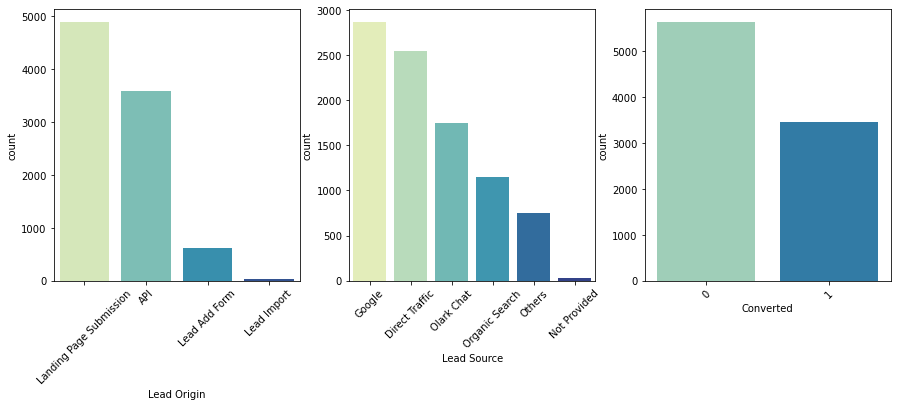

In [32]:
#  make a barplot  of categotical variables- 
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.countplot(x=lead['Lead Origin'],  data=lead,order=lead['Lead Origin'].value_counts(ascending=False).index,palette='YlGnBu')
plt.xticks(rotation=45)
plt.subplot(1,3,2)
sns.countplot(x=lead['Lead Source'],  data=lead,order=lead['Lead Source'].value_counts(ascending=False).index,palette='YlGnBu')
plt.xticks(rotation=45)
plt.subplot(1,3,3)
sns.countplot(x=lead['Converted'],  data=lead,order=lead['Converted'].value_counts(ascending=False).index,palette='YlGnBu')
plt.xticks(rotation=45)
plt.show()

 - Data is not highly skewed in any of the columns above. `Lead Source` and `Lead Origin` have different categories skewed normally

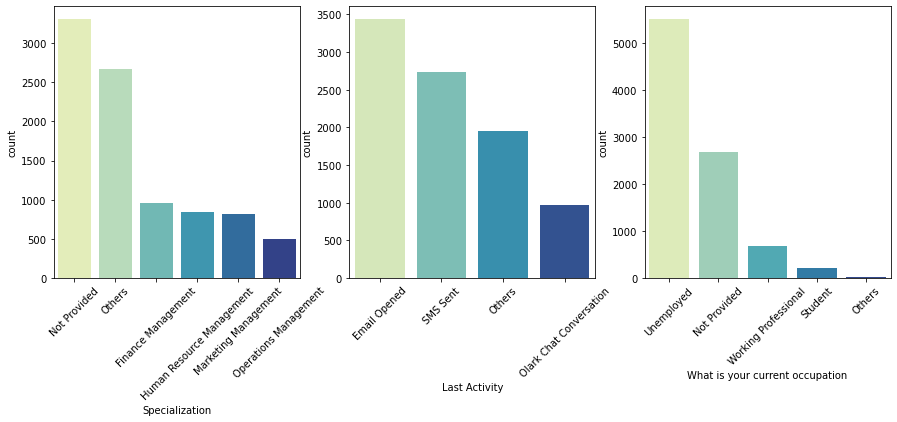

In [33]:
# define a function to make a barplot  - 
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.countplot(x=lead['Specialization'],  data=lead,order=lead['Specialization'].value_counts(ascending=False).index,palette='YlGnBu')
plt.xticks(rotation=45)
plt.subplot(1,3,2)
sns.countplot(x=lead['Last Activity'],  data=lead,order=lead['Last Activity'].value_counts(ascending=False).index,palette='YlGnBu')
plt.xticks(rotation=45)
plt.subplot(1,3,3)
sns.countplot(x=lead['What is your current occupation'],  data=lead,order=lead['What is your current occupation'].value_counts(ascending=False).index,palette='YlGnBu')
plt.xticks(rotation=45)
plt.show()

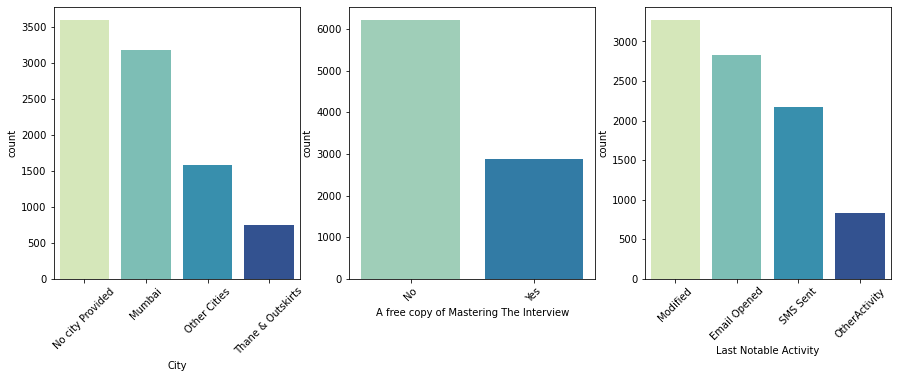

In [34]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.countplot(x=lead['City'],  data=lead,order=lead['City'].value_counts(ascending=False).index,palette='YlGnBu')
plt.xticks(rotation=45)
plt.subplot(1,3,2)
sns.countplot(x=lead['A free copy of Mastering The Interview'],  data=lead,order=lead['A free copy of Mastering The Interview'].value_counts(ascending=False).index,palette='YlGnBu')
plt.xticks(rotation=45)
plt.subplot(1,3,3)
sns.countplot(x=lead['Last Notable Activity'],  data=lead,order=lead['Last Notable Activity'].value_counts(ascending=False).index,palette='YlGnBu')
plt.xticks(rotation=45)
plt.show()

 - Upon Univariate Analysis of all the categorical variables, the data is not skewed and is distributed normally

### Univariate Analysis - Numerical columns

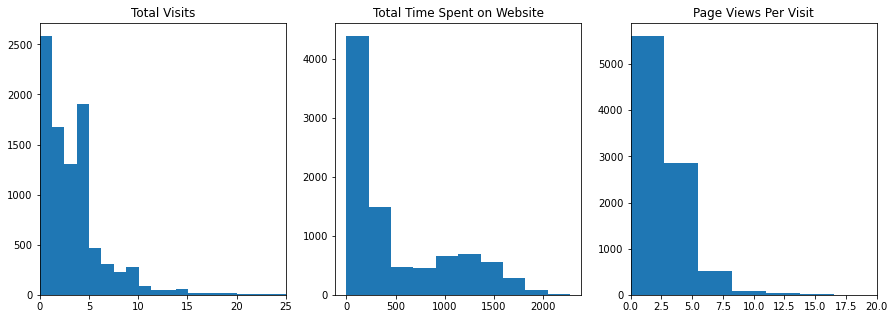

In [35]:
## histogram for numerical columns
plt.figure(figsize = (15,5))
plt.subplot(1,3,1)
plt.hist(lead['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(1,3,2)
plt.hist(lead['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(1,3,3)
plt.hist(lead['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

- Histogram depicts the behavior of numerical columns. All the three columns have data distributed properly

### Bivariate Analysis  

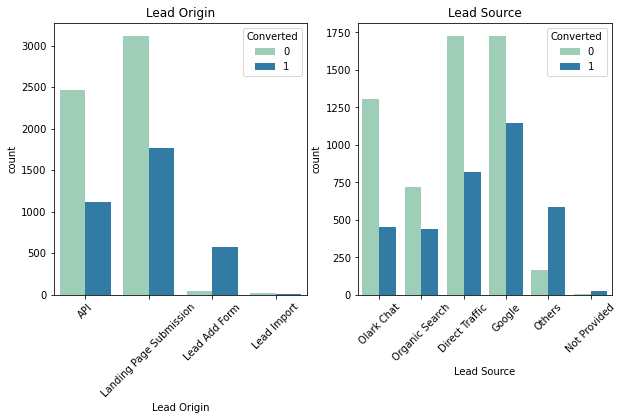

In [36]:
# Considering categorical variables, `Lead Origin` and Lead Source
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= lead,palette='YlGnBu').tick_params(axis='x', rotation = 45)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= lead, palette='YlGnBu').tick_params(axis='x', rotation = 45)
plt.title('Lead Source')
plt.show()

- `Landing Page Submission` category people are more likely to get converted. People who has `Google` as Lead source are also likely to get converted

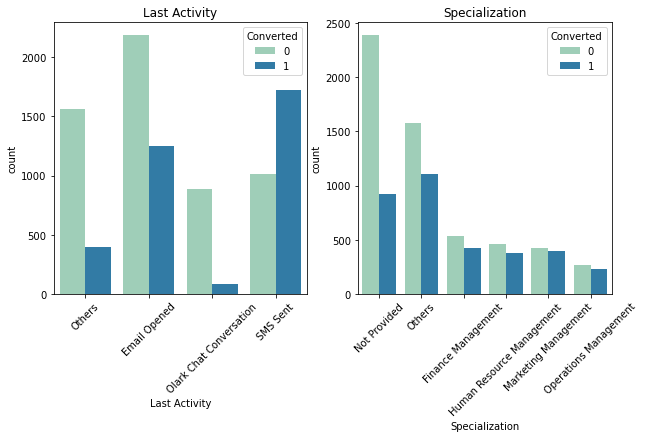

In [37]:
# Considering categorical variables, `Last Activity` and Specialization
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Last Activity', hue='Converted', data= lead,palette='YlGnBu').tick_params(axis='x', rotation = 45)
plt.title('Last Activity')

plt.subplot(1,2,2)
sns.countplot(x='Specialization', hue='Converted', data= lead, palette='YlGnBu').tick_params(axis='x', rotation = 45)
plt.title('Specialization')
plt.show()

- `SMS Sent` category of last activity has got more converters. Specialization has got conversion equally distributed

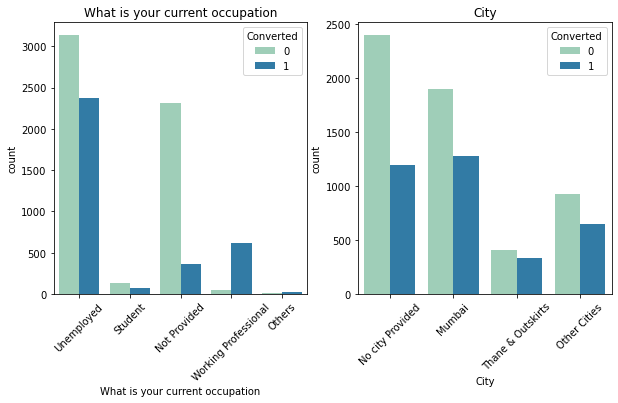

In [38]:
# Considering categorical variables, `What is your current occupation` and City
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='What is your current occupation', hue='Converted', data= lead,palette='YlGnBu').tick_params(axis='x', rotation = 45)
plt.title('What is your current occupation')

plt.subplot(1,2,2)
sns.countplot(x='City', hue='Converted', data= lead, palette='YlGnBu').tick_params(axis='x', rotation = 45)
plt.title('City')
plt.show()

- People who is Unemployed likely to get converted. This is due to the fact that they want to improve their skills.
People from Mumbai city are also likely to get converted.

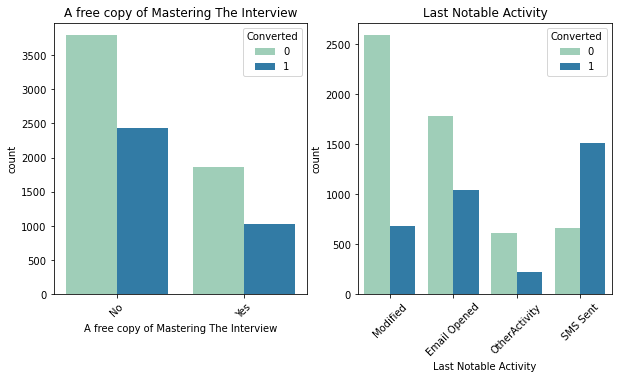

In [39]:
# Considering categorical variables, `A free copy of Mastering The Interview` and Last Notable Activity
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= lead,palette='YlGnBu').tick_params(axis='x', rotation = 45)
plt.title('A free copy of Mastering The Interview')

plt.subplot(1,2,2)
sns.countplot(x='Last Notable Activity', hue='Converted', data= lead, palette='YlGnBu').tick_params(axis='x', rotation = 45)
plt.title('Last Notable Activity')
plt.show()

### Outlier Treatment

In [40]:
lead[['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']].describe([.90,.95,.99]).T

,count,mean,std,min,50%,90%,95%,99%,max
TotalVisits,9103.0,3.445238,4.854853,0.0,3.0,7.0,10.0,17.00,251.0
Total Time Spent on Website,9103.0,481.350104,545.066142,0.0,244.0,1372.0,1556.9,1838.96,2272.0
Page Views Per Visit,9103.0,2.362820,2.161418,0.0,2.0,5.0,6.0,9.00,55.0


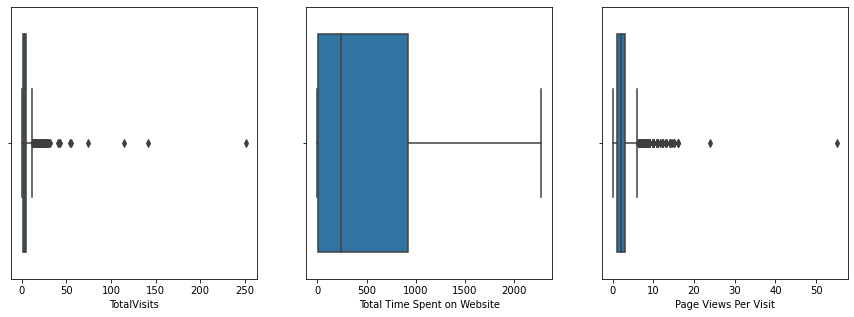

In [41]:
# Plotting boxplot for numerical cols
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(lead['TotalVisits'])
plt.subplot(1,3,2)
sns.boxplot(lead['Total Time Spent on Website'])
plt.subplot(1,3,3)
sns.boxplot(lead['Page Views Per Visit'])
plt.show()


- As it is seen, there are outliers in the data

In [42]:
# Outlier Treatment for Total Visits
# Performing Capping on TotalVisists
q1 = lead['TotalVisits'].quantile(0.05)
q4 = lead['TotalVisits'].quantile(0.95)

lead['TotalVisits'][lead['TotalVisits']<=q1] = q1 
lead['TotalVisits'][lead['TotalVisits']>=q4] = q4
# Performing Capping on Page Views Per Visit
q1 = lead['Page Views Per Visit'].quantile(0.05)
q4 = lead['Page Views Per Visit'].quantile(0.95)

lead['Page Views Per Visit'][lead['Page Views Per Visit']<=q1] = q1 
lead['Page Views Per Visit'][lead['Page Views Per Visit']>=q4] = q4

- Outliers has been treated by Capping the data

## 4. Create Dummies

In [43]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9103 non-null   object 
 1   Lead Number                             9103 non-null   int64  
 2   Lead Origin                             9103 non-null   object 
 3   Lead Source                             9103 non-null   object 
 4   Converted                               9103 non-null   int64  
 5   TotalVisits                             9103 non-null   float64
 6   Total Time Spent on Website             9103 non-null   int64  
 7   Page Views Per Visit                    9103 non-null   float64
 8   Last Activity                           9103 non-null   object 
 9   Specialization                          9103 non-null   object 
 10  What is your current occupation         9103 non-null   obje

In [44]:
lead.loc[:, lead.dtypes == 'object'].columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Last Activity',
       'Specialization', 'What is your current occupation', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [45]:
# Create dummy variables using the 'get_dummies'
dummy = pd.get_dummies(lead[['Lead Origin' ,'Lead Source', 'Last Activity','Specialization', 'What is your current occupation','City','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)
# Add the results to the master dataframe
lead_df = pd.concat([lead, dummy], axis=1)
lead_df

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Not Provided,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Not Provided,Specialization_Operations Management,Specialization_Others,What is your current occupation_Others,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_No city Provided,City_Other Cities,City_Thane & Outskirts,A free copy of Mastering The Interview_Yes,Last Notable Activity_Modified,Last Notable Activity_OtherActivity,Last Notable Activity_SMS Sent
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.00,Others,Not Provided,Unemployed,No city Provided,No,Modified,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.50,Email Opened,Not Provided,Unemployed,No city Provided,No,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.00,Email Opened,Others,Student,Mumbai,Yes,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.00,Others,Others,Unemployed,Mumbai,No,Modified,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.00,Others,Not Provided,Unemployed,Mumbai,No,Modified,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,1,8.0,1845,2.67,Others,Others,Unemployed,Mumbai,No,OtherActivity,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,0,2.0,238,2.00,SMS Sent,Others,Unemployed,Mumbai,Yes,SMS Sent,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,0,2.0,199,2.00,SMS Sent,Others,Unemployed,Mumbai,Yes,SMS Sent,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,1,3.0,499,3.00,SMS Sent,Human Resource Management,Not Provided,Other Cities,No,SMS Sent,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [46]:
lead_df.drop(['Lead Origin' ,'Lead Source', 'Last Activity','Specialization', 'What is your current occupation','City','A free copy of Mastering The Interview', 'Last Notable Activity'], axis=1,inplace=True)

In [47]:
lead_df.shape

(9103, 33)

## 5. Test-Train split

In [48]:
# Import the required library
from sklearn.model_selection import train_test_split

In [49]:
# Dropping Converted for X
X = lead_df.drop(['Converted', 'Prospect ID', 'Lead Number'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Not Provided,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Not Provided,Specialization_Operations Management,Specialization_Others,What is your current occupation_Others,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_No city Provided,City_Other Cities,City_Thane & Outskirts,A free copy of Mastering The Interview_Yes,Last Notable Activity_Modified,Last Notable Activity_OtherActivity,Last Notable Activity_SMS Sent
0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0
1,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
4,2.0,1428,1.0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0


In [50]:
# Putting the target variable in y
y = lead_df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [51]:
# Split the dataset into 70% and 30% for train and test respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

### Perform Scaling

In [52]:
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler
# Scale the three numeric features
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Not Provided,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Not Provided,Specialization_Operations Management,Specialization_Others,What is your current occupation_Others,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_No city Provided,City_Other Cities,City_Thane & Outskirts,A free copy of Mastering The Interview_Yes,Last Notable Activity_Modified,Last Notable Activity_OtherActivity,Last Notable Activity_SMS Sent
5414,0.2,0.669454,0.333333,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1
1411,0.4,0.555018,0.666667,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
2137,0.4,0.029049,0.221667,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0
97,0.0,0.000000,0.000000,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0
4949,0.6,0.569982,0.500000,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1


### Looking at Correlations

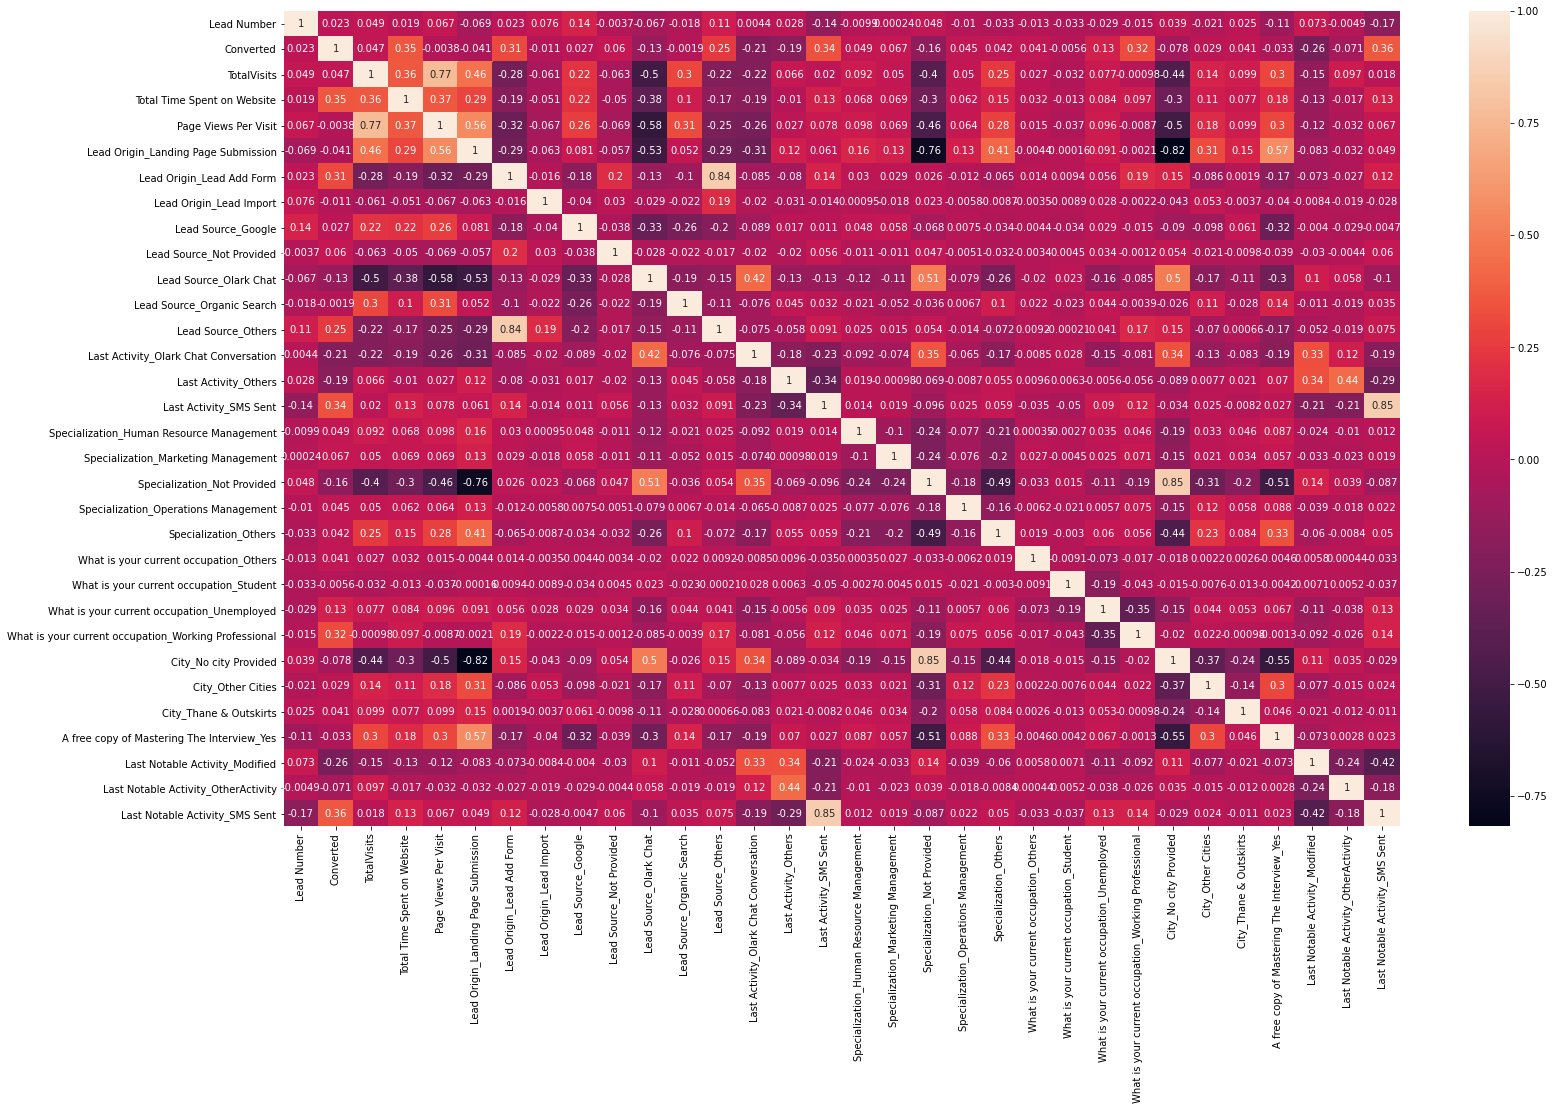

In [53]:
plt.figure(figsize=(25,15))
sns.heatmap(lead_df.corr(),annot=True)
plt.show()

- Since there are lot of variables, it is difficult to find the highly correlated variables.

## 6. Model Building

In [54]:
import statsmodels.api as sm

#Logistic Regression model 
logm1 = sm.GLM(y_train, sm.add_constant(X_train), family= sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6341
Model Family:                Binomial   Df Model:                           30
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2576.6
Date:                Mon, 07 Sep 2020   Deviance:                       5153.2
Time:                        10:09:21   Pearson chi2:                 6.54e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1402      0.252     -8.477      0.000      -2.635      -1.645
TotalVisits                                              1.1875      0.200      5.930      0.000       0.795       1.580
Total Time Spent on Website                              4.4260      0.168     26.280      0.000       4.096       4.756
Page Views Per Visit                                    -0.9617      0.207     -4.645      0.000      -1.367      -0.556
Lead Origin_Landing Page Submission                     -0.9849      0.153     -6.420      0.000      -1.286      -0.684
Lead Origin_Lead Add Form                                3.4234      0.370      9.247      0.000       2.698       4.149
Lead Origin_Lead Import                                  0.2510      0.584      0.430      0.668      -0.894       1.396
Lead Source_Google                                       0.3472      0.116      2.998      0.003       0.120       0.574
Lead Source_Not Provided                                 0.1669      0.856      0.195      0.845      -1.511       1.844
Lead Source_Olark Chat                                   1.4083      0.169      8.343      0.000       1.077       1.739
Lead Source_Organic Search                               0.1773      0.128      1.380      0.168      -0.074       0.429
Lead Source_Others                                       0.3719      0.305      1.219      0.223      -0.226       0.970
Last Activity_Olark Chat Conversation                   -1.5350      0.216     -7.123      0.000      -1.957      -1.113
Last Activity_Others                                    -0.8585      0.171     -5.021      0.000      -1.194      -0.523
Last Activity_SMS Sent                                   0.3560      0.187      1.906      0.057      -0.010       0.722
Specialization_Human Resource Management                -0.0604      0.153     -0.394      0.693      -0.361       0.240
Specialization_Marketing Management                      0.1924      0.156      1.237      0.216      -0.112       0.497
Specialization_Not Provided                             -0.7017      0.190     -3.693      0.000      -1.074      -0.329
Specialization_Operations Management                     0.0138      0.180      0.076      0.939      -0.339       0.367
Specialization_Others                                   -0.1180      0.123     -0.962      0.336      -0.358       0.122
What is your current occupation_Others                   2.6643      0.575      4.633      0.000       1.537       3.791
What is your current occupation_Student                  1.1190      0.240      4.657      0.000       0.648       1.590
What is your current occupation_Unemployed               1

### Feature Selection using RFE

In [55]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [56]:
from sklearn.feature_selection import RFE 
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [57]:
rfe.support_

array([ True,  True,  True,  True,  True, False, False, False,  True,
       False, False,  True,  True, False, False, False,  True, False,
       False,  True,  True,  True,  True, False, False, False, False,
       False,  True,  True])

In [58]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 16),
 ('Lead Source_Google', False, 4),
 ('Lead Source_Not Provided', False, 8),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 9),
 ('Lead Source_Others', False, 3),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_SMS Sent', False, 6),
 ('Specialization_Human Resource Management', False, 13),
 ('Specialization_Marketing Management', False, 5),
 ('Specialization_Not Provided', True, 1),
 ('Specialization_Operations Management', False, 15),
 ('Specialization_Others', False, 10),
 ('What is your current occupation_Others', True, 1),
 ('What is your current occupation_Student', True, 1),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occu

In [59]:
col = X_train.columns[rfe.support_]
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Specialization_Not Provided',
       'What is your current occupation_Others',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_OtherActivity',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [60]:
# Selecting columns selected by RFE
X_train = X_train[col]

In [61]:
# Model Building
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2594.5
Date:                Mon, 07 Sep 2020   Deviance:                       5188.9
Time:                        10:09:22   Pearson chi2:                 6.47e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0608      0.183    -11.236      0.000      -2.420      -1.701
TotalVisits                                              1.1817      0.195      6.058      0.000       0.799       1.564
Total Time Spent on Website                              4.4170      0.166     26.536      0.000       4.091       4.743
Page Views Per Visit                                    -0.8807      0.201     -4.383      0.000      -1.275      -0.487
Lead Origin_Landing Page Submission                     -1.0193      0.131     -7.773      0.000      -1.276      -0.762
Lead Origin_Lead Add Form                                3.5574      0.238     14.928      0.000       3.090       4.025
Lead Source_Olark Chat                                   1.1290      0.142      7.968      0.000       0.851       1.407
Last Activity_Olark Chat Conversation                   -1.7147      0.179     -9.590      0.000      -2.065      -1.364
Last Activity_Others                                    -1.0367      0.120     -8.634      0.000      -1.272      -0.801
Specialization_Not Provided                             -0.9427      0.128     -7.359      0.000      -1.194      -0.692
What is your current occupation_Others                   2.5807      0.577      4.469      0.000       1.449       3.712
What is your current occupation_Student                  1.0851      0.238      4.551      0.000       0.618       1.552
What is your current occupation_Unemployed               1.0621      0.088     12.021      0.000       0.889       1.235
What is your current occupation_Working Professional     3.5108      0.208     16.841      0.000       3.102       3.919
Last Notable Activity_OtherActivity                      0.5946      0.159      3.749      0.000       0.284       0.905
Last Notable Activity_SMS Sent                           1.2471      0.083     15.050      0.000       1.085       1.409
========================================================================================================================
"""

- Most of the p-values are less and so it's consisitent

In [62]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [63]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,7.77
0,TotalVisits,6.09
3,Lead Origin_Landing Page Submission,4.21
11,What is your current occupation_Unemployed,2.97
8,Specialization_Not Provided,2.62
1,Total Time Spent on Website,2.25
5,Lead Source_Olark Chat,2.13
7,Last Activity_Others,1.83
14,Last Notable Activity_SMS Sent,1.61
6,Last Activity_Olark Chat Conversation,1.55


- VIF of 'Page Views Per Visit' is high, hence dropping the column

In [64]:
X_train.drop('Page Views Per Visit', axis = 1, inplace = True)

In [65]:
# Rebuild the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6357
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2604.1
Date:                Mon, 07 Sep 2020   Deviance:                       5208.3
Time:                        10:09:23   Pearson chi2:                 6.44e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.2827      0.177    -12.913      0.000      -2.629      -1.936
TotalVisits                                              0.6946      0.161      4.327      0.000       0.380       1.009
Total Time Spent on Website                              4.4055      0.166     26.515      0.000       4.080       4.731
Lead Origin_Landing Page Submission                     -1.0549      0.131     -8.077      0.000      -1.311      -0.799
Lead Origin_Lead Add Form                                3.7535      0.234     16.022      0.000       3.294       4.213
Lead Source_Olark Chat                                   1.3131      0.136      9.666      0.000       1.047       1.579
Last Activity_Olark Chat Conversation                   -1.7089      0.179     -9.571      0.000      -2.059      -1.359
Last Activity_Others                                    -1.0059      0.119     -8.428      0.000      -1.240      -0.772
Specialization_Not Provided                             -0.9132      0.128     -7.157      0.000      -1.163      -0.663
What is your current occupation_Others                   2.6131      0.572      4.568      0.000       1.492       3.734
What is your current occupation_Student                  1.1021      0.239      4.615      0.000       0.634       1.570
What is your current occupation_Unemployed               1.0637      0.088     12.070      0.000       0.891       1.236
What is your current occupation_Working Professional     3.5096      0.208     16.861      0.000       3.102       3.918
Last Notable Activity_OtherActivity                      0.6465      0.157      4.115      0.000       0.339       0.954
Last Notable Activity_SMS Sent                           1.2242      0.082     14.848      0.000       1.063       1.386
========================================================================================================================
"""

In [66]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,3.62
0,TotalVisits,3.33
10,What is your current occupation_Unemployed,2.94
7,Specialization_Not Provided,2.51
1,Total Time Spent on Website,2.24
4,Lead Source_Olark Chat,2.06
6,Last Activity_Others,1.83
13,Last Notable Activity_SMS Sent,1.61
5,Last Activity_Olark Chat Conversation,1.55
12,Last Notable Activity_OtherActivity,1.48


 - All the VIF is less than 5 and p-values < 0.05. Hence the model looks consistent and good

## 7. Making Prediction

In [67]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5414    0.884776
1411    0.364283
2137    0.133765
97      0.073915
4949    0.867389
2447    0.140380
3529    0.196270
4064    0.132067
7208    0.834965
3436    0.353647
dtype: float64

In [68]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.88477595, 0.36428285, 0.13376454, 0.07391505, 0.86738883,
       0.1403805 , 0.19627032, 0.13206737, 0.83496462, 0.35364659])

In [69]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Pred':y_train_pred})
y_train_pred_final['New Prospect ID'] = y_train.index
y_train_pred_final.head(5)

,Converted,Conversion_Pred,New Prospect ID
0,1,0.884776,5414
1,1,0.364283,1411
2,0,0.133765,2137
3,0,0.073915,97
4,1,0.867389,4949


In [70]:
y_train_pred_final['Lead Score'] = y_train_pred_final['Conversion_Pred']*100
y_train_pred_final

,Converted,Conversion_Pred,New Prospect ID,Lead Score
0,1,0.884776,5414,88.477595
1,1,0.364283,1411,36.428285
2,0,0.133765,2137,13.376454
3,0,0.073915,97,7.391505
4,1,0.867389,4949,86.738883
...,...,...,...,...
6367,0,0.159676,4918,15.967614
6368,0,0.052716,7411,5.271555
6369,0,0.118724,1399,11.872434
6370,0,0.193243,7413,19.324290


In [71]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Pred.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Pred,New Prospect ID,Lead Score,Predicted
0,1,0.884776,5414,88.477595,1
1,1,0.364283,1411,36.428285,0
2,0,0.133765,2137,13.376454,0
3,0,0.073915,97,7.391505,0
4,1,0.867389,4949,86.738883,1


## 8. Model Evaluation

In [72]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

In [73]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3446,  455],
       [ 725, 1746]])

In [74]:
# Predicted     not_churn    churn
# Actual
# not_churn        3446       455
# churn             725      1746

In [75]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8148148148148148

- The model has around 81% accuracy, which is a very good value

In [76]:

# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [77]:

# Calculating the sensitivity
TP/(TP+FN)

0.7065965196276811

In [78]:
# Calculating the specificity
TN/(TN+FP)

0.8833632401948218

- Choosing cut-off as 0.5 has Accuracy 81%, Sensitivity 70% and Specifity 88%

## 9. Choosing Optimal Cut-OFF (ROC Curve)

In [79]:

# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

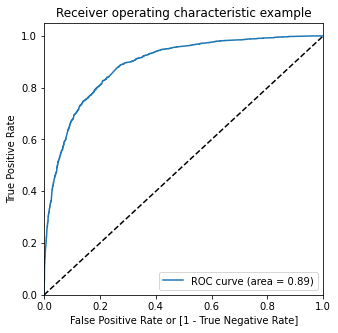

In [80]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Pred, drop_intermediate = False )
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Pred)

- Area under ROC curve is 0.89% which is a very good value

In [81]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Pred.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Pred,New Prospect ID,Lead Score,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.884776,5414,88.477595,1,1,1,1,1,1,1,1,1,1,0
1,1,0.364283,1411,36.428285,0,1,1,1,1,0,0,0,0,0,0
2,0,0.133765,2137,13.376454,0,1,1,0,0,0,0,0,0,0,0
3,0,0.073915,97,7.391505,0,1,0,0,0,0,0,0,0,0,0
4,1,0.867389,4949,86.738883,1,1,1,1,1,1,1,1,1,1,0


In [82]:

# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.387790,1.000000,0.000000
0.1,0.1,0.631670,0.973695,0.415022
0.2,0.2,0.755179,0.916228,0.653166
0.3,0.3,0.792530,0.877782,0.738529
0.4,0.4,0.808851,0.774585,0.830556
0.5,0.5,0.814815,0.706597,0.883363
0.6,0.6,0.800220,0.608660,0.921559
0.7,0.7,0.782800,0.526103,0.945399
0.8,0.8,0.758475,0.428976,0.967188
0.9,0.9,0.717671,0.293808,0.986157


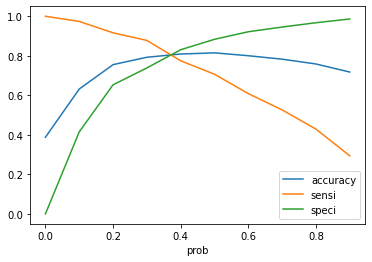

In [83]:
# Plotting it
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

- Above graph shows that the optimal cut off is 0.4

In [84]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Pred.map( lambda x: 1 if x > 0.4 else 0)
y_train_pred_final.head()

,Converted,Conversion_Pred,New Prospect ID,Lead Score,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.884776,5414,88.477595,1,1,1,1,1,1,1,1,1,1,0,1
1,1,0.364283,1411,36.428285,0,1,1,1,1,0,0,0,0,0,0,0
2,0,0.133765,2137,13.376454,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.073915,97,7.391505,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.867389,4949,86.738883,1,1,1,1,1,1,1,1,1,1,0,1


In [85]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8088512241054614

In [86]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3240,  661],
       [ 557, 1914]])

In [87]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [88]:

# Calculating the sensitivity
TP/(TP+FN)

0.7745851881829219

In [89]:
# Calculating the specificity
TN/(TN+FP)

0.8305562676236863

- Choosing cut-off as 0.4 has Accuracy 80%, Sensitivity 77% and Specifity 83%

## 10. Predict on Test-set

In [90]:
# Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [91]:
# Substituting all the columns in the final train model
col = X_train.columns

In [92]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Last Activity_Olark Chat Conversation,Last Activity_Others,Specialization_Not Provided,What is your current occupation_Others,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_OtherActivity,Last Notable Activity_SMS Sent
5643,1.0,0.1,0.026408,1,0,0,0,1,0,0,0,1,0,0,0
7718,1.0,0.6,0.140845,0,0,0,0,0,1,0,0,1,0,0,0
4666,1.0,0.3,0.089789,0,0,0,0,1,1,0,0,0,0,0,0
3476,1.0,0.6,0.095511,1,0,0,0,0,0,0,0,0,0,0,0
4881,1.0,0.4,0.401849,1,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,1.0,0.4,0.261884,1,0,0,0,1,0,0,0,1,0,0,0
8589,1.0,0.1,0.190141,1,0,0,0,1,0,0,0,0,0,0,0
54,1.0,0.7,0.042254,0,0,0,0,0,1,0,0,0,0,0,0
7376,1.0,0.2,0.192782,1,0,0,0,0,0,0,0,1,0,0,0


In [93]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.043357
1,0,0.250676
2,0,0.026652
3,0,0.075854
4,1,0.453310


In [119]:
# Making prediction using cut off 0.4
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.4 else 0)
y_pred_final['Lead Score'] = y_pred_final['Conversion_Prob']*100
y_pred_final

,Converted,Conversion_Prob,final_predicted,Lead Score
0,0,0.043357,0,4.335668
1,0,0.250676,0,25.067562
2,0,0.026652,0,2.665159
3,0,0.075854,0,7.585393
4,1,0.453310,1,45.331003
...,...,...,...,...
2726,1,0.136082,0,13.608245
2727,0,0.031179,0,3.117871
2728,0,0.074221,0,7.422084
2729,0,0.216586,0,21.658623


In [120]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8176492127425852

In [96]:
# Creating confusion matrix 
confusion3 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion3

array([[1460,  281],
       [ 217,  773]])

In [97]:
# Substituting the value of true positive
TP = confusion3[1,1]
# Substituting the value of true negatives
TN = confusion3[0,0]
# Substituting the value of false positives
FP = confusion3[0,1] 
# Substituting the value of false negatives
FN = confusion3[1,0]

In [98]:
# Calculating the sensitivity
TP/(TP+FN)

0.7808080808080808

In [99]:
# Calculating the specificity
TN/(TN+FP)

0.8385985066053991

- Having cut-off as 0.4 accuracy is 81%, sensitivity is 78%, Specificity is 83% on Test data

## Conclusion:
- It was found that the variables that mattered the most in the potential buyers are (In descending order) :
        - Lead Origin_Landing Page Submission
        - TotalVisits
        - What is your current occupation_Unemployed
        - Total Time Spent on Website
        - Lead Source_Olark Chat
        - Last Activity_Others
        - Last Notable Activity_SMS Sent
        - Last Activity_Olark Chat Conversation
        - Last Notable Activity_OtherActivity
        - Lead Origin_Lead Add Form
        - What is your current occupation_Working Profes
        - What is your current occupation_Student
Keeping these in mind the X Education can flourish as they have a very high chance to get almost all the potential buyers to change their mind and buy their courses.